In [4]:
file = open("royal_data.txt")
royal_data = file.readlines()
file.close()
print(royal_data)

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


In [5]:
for i in range(len(royal_data)):
    royal_data[i] = royal_data[i].lower().replace('\n', "")
print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


In [6]:
stopwards = ["is","are", "be", "can", "now", "will", "a", "there", "now", "only" , "the", "at", "it", "and"]

In [7]:
filtered_words = []
for sent in royal_data:
    tmp = []
    for word in sent.split():
        if word not in stopwards:
            tmp.append(word)
    filtered_words.append(tmp)
print(filtered_words)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


In [8]:
biagrams = []
for word_list in filtered_words:
    for i in range(len(word_list) - 1):
        for j in range(i + 1, len(word_list)):
            biagrams.append([word_list[i], word_list[j]])
            biagrams.append([word_list[j], word_list[i]])

In [9]:
print(biagrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


In [10]:
all_words = []
for seen in filtered_words:
    all_words.extend(seen)
all_words = list(set(all_words))

In [11]:
print(all_words)
print(len(all_words))

['princess', 'strong', 'prince', 'future', 'son', 'woman', 'daughter', 'queen', 'boy', 'king', 'beautiful', 'man']
12


### One Hot Encoding

In [13]:
words_dict = {}
counter = 0
for word in all_words:
    words_dict[word] = counter
    counter += 1
print(words_dict)

{'princess': 0, 'strong': 1, 'prince': 2, 'future': 3, 'son': 4, 'woman': 5, 'daughter': 6, 'queen': 7, 'boy': 8, 'king': 9, 'beautiful': 10, 'man': 11}


In [14]:
import numpy as np
one_hot_data = np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
    one_hot_data[i][i] = 1
print(one_hot_data)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [15]:
one_hot_dict = {}
for i in range(len(all_words)):
    one_hot_dict[all_words[i]] =  one_hot_data[i]

In [16]:
print(one_hot_dict)

{'princess': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'strong': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'prince': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'future': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'son': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), 'woman': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]), 'daughter': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]), 'queen': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), 'boy': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), 'king': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), 'beautiful': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), 'man': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}


In [17]:
X = []
Y = []

for bi in biagrams:
    X.append(one_hot_dict[bi[0]])
    Y.append(one_hot_dict[bi[1]])

In [18]:
X = np.array(X)
Y = np.array(Y)
print(Y)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.

In [19]:
print(X)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.

## Model Training

In [21]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
model = Sequential()
model.add(Input(shape = (12, )))
model.add(Dense(2, activation='linear'))
model.add(Dense(12, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy", "recall"])

In [83]:
model.fit(X, Y, epochs=1000)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3395 - loss: 1.8166 - recall: 0.0300
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3603 - loss: 1.8057 - recall: 0.0300 
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3499 - loss: 1.8152 - recall: 0.0300 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3499 - loss: 1.8097 - recall: 0.0300 
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3499 - loss: 1.8090 - recall: 0.0300 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3603 - loss: 1.7912 - recall: 0.0300 
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3603 - loss: 1.8020 - recall: 0.0300 
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3499 - loss: 1.7980 - recall: 0.0300 
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3395 - loss: 1.8082 - recall: 0.0300 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3499 - l

In [85]:
weights = model.get_weights()[0]

In [87]:
print(weights)

[[ 2.2162197   0.42087886]
 [-1.3836249  -0.5274101 ]
 [ 0.22253652 -1.3566281 ]
 [-0.27501985 -1.6217861 ]
 [-0.95237404 -1.0777338 ]
 [ 0.79244757  0.83805096]
 [-1.1223698   1.7584169 ]
 [ 0.22568187  1.515102  ]
 [-1.3352791  -0.5304704 ]
 [-0.9974611  -0.8081211 ]
 [ 0.46077353  1.6829312 ]
 [ 0.5947339  -1.2907089 ]]


In [89]:
for words in all_words:
    print(words_dict[words])

0
1
2
3
4
5
6
7
8
9
10
11


In [91]:
word_embeddings = {}
for words in all_words:
    word_embeddings[words] = weights[words_dict[words]]
print(word_embeddings)

{'princess': array([2.2162197 , 0.42087886], dtype=float32), 'strong': array([-1.3836249, -0.5274101], dtype=float32), 'prince': array([ 0.22253652, -1.3566281 ], dtype=float32), 'future': array([-0.27501985, -1.6217861 ], dtype=float32), 'son': array([-0.95237404, -1.0777338 ], dtype=float32), 'woman': array([0.79244757, 0.83805096], dtype=float32), 'daughter': array([-1.1223698,  1.7584169], dtype=float32), 'queen': array([0.22568187, 1.515102  ], dtype=float32), 'boy': array([-1.3352791, -0.5304704], dtype=float32), 'king': array([-0.9974611, -0.8081211], dtype=float32), 'beautiful': array([0.46077353, 1.6829312 ], dtype=float32), 'man': array([ 0.5947339, -1.2907089], dtype=float32)}


In [93]:
for words in all_words:
    print(words,  ":", word_embeddings[words])

princess : [2.2162197  0.42087886]
strong : [-1.3836249 -0.5274101]
prince : [ 0.22253652 -1.3566281 ]
future : [-0.27501985 -1.6217861 ]
son : [-0.95237404 -1.0777338 ]
woman : [0.79244757 0.83805096]
daughter : [-1.1223698  1.7584169]
queen : [0.22568187 1.515102  ]
boy : [-1.3352791 -0.5304704]
king : [-0.9974611 -0.8081211]
beautiful : [0.46077353 1.6829312 ]
man : [ 0.5947339 -1.2907089]


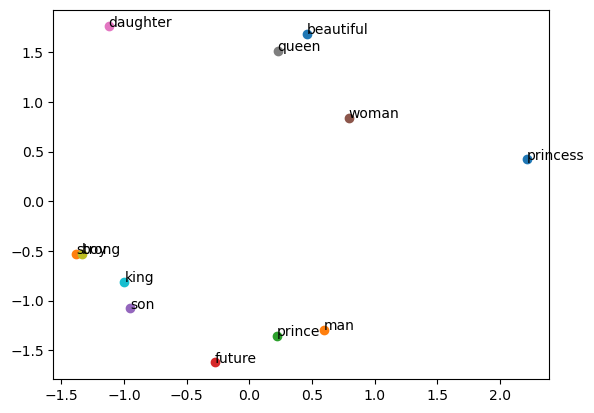

In [95]:
import matplotlib.pyplot as plt

for word in all_words:
    cordinates = word_embeddings[word]
    # print(cordinates)
    plt.scatter(cordinates[0], cordinates[1])
    plt.annotate(word, (cordinates[0], cordinates[1]))

In [97]:
!git init

Initialized empty Git repository in C:/Users/abdim/Deep_Learning/Word_Embeddings/.git/
